# Challenge - TeachSpin's Muon Lifetime Experiment

In [TeachSpin's Muon Lifetime Experiment](http://www.teachspin.com/muon-physics.html), a data file is produced that contains information about muon decays. It is a two-column tab-delimited text file. According to the TeachSpin manual,

    The first field is an encoded positive integer that is either the number of nanoseconds between successive signals that triggered the readout electronics, or the number of “timeouts” in the one-second interval identified by the corresponding data in the second column. An integer less than 40000 is the time, measured in nanoseconds, between successive signals and, background aside, identifies a muon decay. Only data of this type is entered automatically into the decay time histogram.
    
    An integer greater than or equal to 40000 corresponds to the situation where the time between successive signals exceeded the timing circuit’s maximum number of 1101 clock cycles or 22020 ns. A non-zero number in the units place indicates the number of times this ‘timeout” situation occurred in the particular second identified by the data in the first field. For example, the integer 40005 in the first field indicates that the readout circuit was triggered 5 times in a particular second but that each time the timing circuit reached its maximum number of clock cycles before the next signal arrived.

    The second field is the number of seconds, as measured by the PC, from the beginning of 1 January 1970 (i.e., 00:00:00 1970-01-01 UTC), a date conventional in computer programming.
    
    
## The Challenge

The file [muon-data.txt](muon-data.txt) has decay measurements for more than 2500 decays. Read the file, find the rows that correspond to a muon decay, and create a histogram of counts vs. decay times in $\mu s$. Do an exponential curve fit and determine the lifetime of the muon.

Here's a [nice tutorial](https://bespokeblog.wordpress.com/2011/07/11/basic-data-plotting-with-matplotlib-part-3-histograms/) on plotting histograms.

In [2]:
tlist = []
xlist = []
with open('muon-data.txt', 'r') as file:
    for row in file:
        a, b = row.split()
        if float(a)<40000:
            tlist.append(float(a)/1000)     # store time in a list if it is a real decay
            xlist.append(float(b))     # store x in a list. Do we need these?
file.close()
print(len(xlist))
print(len(tlist))
print(tlist)

2591
2591
[11.32, 0.94, 1.74, 2.22, 0.72, 0.42, 3.74, 0.22, 4.02, 3.16, 1.34, 5.76, 0.1, 1.82, 0.22, 0.38, 0.16, 0.54, 0.34, 0.1, 0.44, 0.1, 1.4, 2.6, 2.22, 2.68, 1.12, 3.44, 0.04, 0.04, 2.92, 0.04, 0.04, 0.04, 2.46, 2.72, 0.04, 0.68, 1.78, 0.86, 1.14, 0.28, 0.36, 0.2, 0.44, 12.98, 2.24, 0.04, 0.08, 0.22, 2.12, 2.54, 4.72, 0.88, 3.2, 1.22, 0.1, 0.14, 2.48, 1.32, 6.86, 1.34, 0.16, 5.02, 0.7, 4.42, 0.76, 0.52, 0.26, 2.18, 0.16, 1.54, 0.14, 0.1, 1.78, 0.26, 1.12, 1.64, 1.06, 1.98, 3.42, 2.72, 7.36, 0.6, 0.74, 0.14, 0.62, 2.2, 1.84, 0.64, 1.08, 5.22, 0.84, 2.18, 1.3, 0.42, 0.36, 3.56, 0.84, 1.74, 2.62, 1.38, 16.44, 0.18, 2.46, 0.54, 1.2, 2.04, 0.3, 0.9, 1.1, 0.26, 1.02, 5.64, 7.18, 0.28, 4.28, 1.78, 1.22, 1.76, 1.18, 0.98, 3.16, 7.9, 5.98, 1.58, 5.68, 9.0, 2.0, 2.62, 0.16, 2.9, 2.52, 6.94, 0.6, 1.04, 0.68, 1.6, 0.62, 0.52, 0.86, 3.24, 1.64, 3.7, 5.34, 2.92, 1.6, 6.26, 0.28, 0.82, 2.1, 1.62, 1.94, 0.08, 0.7, 7.82, 0.98, 1.26, 0.16, 13.18, 6.28, 0.34, 0.18, 6.44, 6.08, 0.8, 4.6, 4.22, 1.68, 

In [3]:
import matplotlib.pyplot as plt
from numpy import *

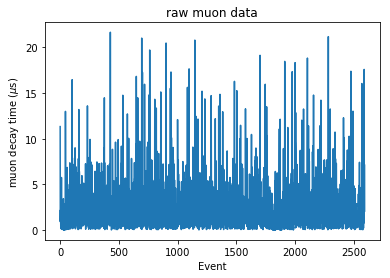

In [4]:
#
# Graph data
#

plt.title('raw muon data')
plt.xlabel('Event')
plt.ylabel('muon decay time ($\mu$s)')
plt.plot(tlist)
plt.show()

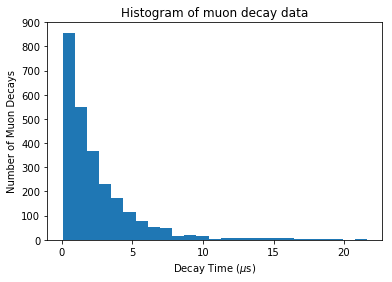

In [5]:
plt.title('Histogram of muon decay data')
plt.xlabel('Decay Time ($\mu$s)')
plt.ylabel('Number of Muon Decays')
plt.hist(tlist, bins=25)
plt.show()

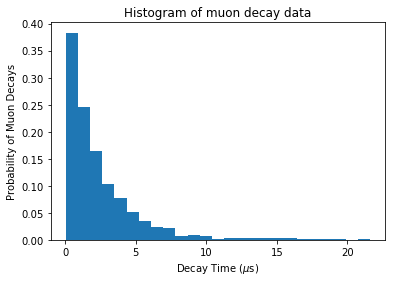

In [30]:
plt.title('Histogram of muon decay data')
plt.xlabel('Decay Time ($\mu$s)')
plt.ylabel('Probability of Muon Decays')
plt.hist(tlist, bins=25, normed=True)
plt.show()

# Least Squares Fitting

Now let's use numpy to fit an exponential function to the muon data.

In [6]:
def expfit(x, a, b):
    return a*exp(-b*x)

What is the format of the histogrammed data? Let's print it to see.

In [7]:
print(plt.hist(tlist, bins=25))

(array([ 857.,  548.,  367.,  232.,  174.,  117.,   79.,   51.,   50.,
         14.,   20.,   14.,    5.,    7.,    8.,    9.,    6.,    8.,
          6.,    4.,    5.,    3.,    2.,    1.,    4.]), array([  0.04  ,   0.9032,   1.7664,   2.6296,   3.4928,   4.356 ,
         5.2192,   6.0824,   6.9456,   7.8088,   8.672 ,   9.5352,
        10.3984,  11.2616,  12.1248,  12.988 ,  13.8512,  14.7144,
        15.5776,  16.4408,  17.304 ,  18.1672,  19.0304,  19.8936,
        20.7568,  21.62  ]), <a list of 25 Patch objects>)


It is a 2D array of [[counts][time][junk]].

In [35]:
import numpy
x0 = [0.5, 2] # initial guesses
hist_x = []
hist_y = []
sigma = []
hist_y, hist_x, junk = plt.hist(tlist, bins=25, normed=True) # create a data array
#hist_x = hist_data[:,0]
#hist_y = hist_data[:,1]

for count in range(0, len(hist_y)):
    sigma.append(1)

hist_x = hist_x[0:25]
#del hist_x[25]
#hist_x.remove(25)
sigma=asarray(sigma)
hist_x = asarray(hist_x)
hist_y = asarray(hist_y)
print(len(hist_x))
print(hist_x)
print(hist_y)
print(sigma)

25
[  0.04     0.9032   1.7664   2.6296   3.4928   4.356    5.2192   6.0824
   6.9456   7.8088   8.672    9.5352  10.3984  11.2616  12.1248  12.988
  13.8512  14.7144  15.5776  16.4408  17.304   18.1672  19.0304  19.8936
  20.7568]
[ 0.38317924  0.2450201   0.16409193  0.10373114  0.07779835  0.05231269
  0.03532224  0.02280297  0.02235585  0.00625964  0.00894234  0.00625964
  0.00223558  0.00312982  0.00357694  0.00402405  0.0026827   0.00357694
  0.0026827   0.00178847  0.00223558  0.00134135  0.00089423  0.00044712
  0.00178847]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [36]:
import scipy.optimize as optimization

result = optimization.curve_fit(expfit, hist_x, hist_y, x0, sigma)
print(result)

(array([ 0.38588816,  0.47672203]), array([[  1.11710449e-05,   1.33481871e-05],
       [  1.33481871e-05,   4.83261037e-05]]))


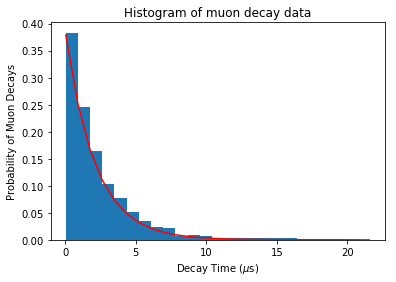

In [40]:
y=result[0][0]*exp(-result[0][1]*array(hist_x)) #y=a*exp(-bx) is the best-fit function
plt.title('Histogram of muon decay data')
plt.xlabel('Decay Time ($\mu$s)')
plt.ylabel('Probability of Muon Decays')
plt.hist(tlist, bins=25, normed=True)
plt.plot(hist_x, y, '-r')
plt.show()

The rate is b= 0.47672203 s$^{-1}$. Thus, the lifetime is $$\tau=\frac{1}{b}=2.10 s.$$